<a href="https://colab.research.google.com/github/areegtarek/COVID-19-Outcome-Prediction/blob/main/COVID_19_Outcome_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COVID-19 Outcome Prediction**

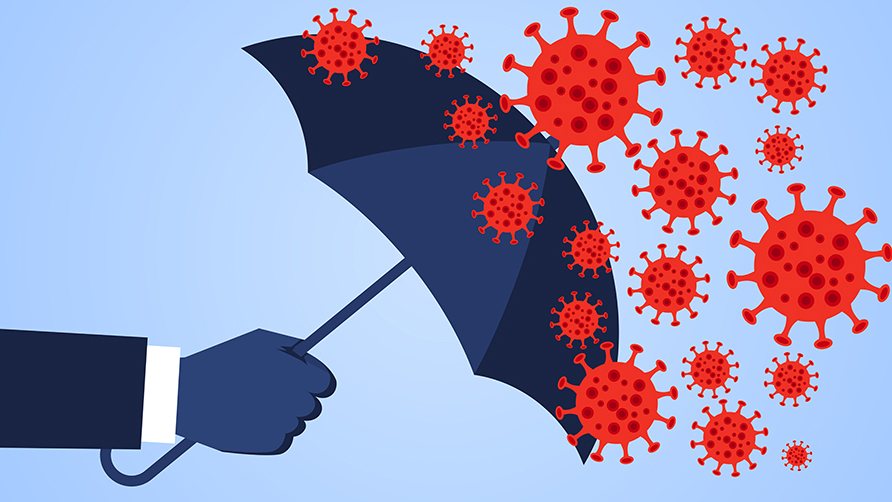

# **Data Description**
The data used in this project will help to identify whether a person is going to recover from
coronavirus symptoms or not based on some pre-defined standard symptoms. These symptoms are
based on guidelines given by the World Health Organization (WHO).
This dataset has daily level information on the number of affected cases, deaths and recovery from
2019 novel coronavirus. Please note that this is a time series data and so the number of cases on
any given day is the cumulative number.
The data is available from 22 Jan, 2020. Data is in “data.csv”.
The dataset contains 14 major variables that will be having an impact on whether someone has
recovered or not, the description of each variable are as follows

**Column Description**

- Country: where the person resides
- Location: which part in the Country
- Age: Classification of the age group for each person, based on WHO Age Group Standard
- Gender: Male or Female
- Visited_Wuhan: whether the person has visited Wuhan, China or not
- From_Wuhan: whether the person is from Wuhan, China or not
- Symptoms: there are six families of symptoms that are coded in six fields.
- Time_before_symptoms_appear:
- Result: death (1) or recovered (0)

# **Goal:**

1. Exploratory Data Analysis
2. Data preparing
3. Running Basic Algorithms(KNN, SVM, DT, Naive Bayes).
4. Hyperparameter Tuning
5. Models Evaluation







In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importing Necessary Libraries and datasets**

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [ ]:
# Load data 
dataset = pd.read_csv("/content/drive/MyDrive/data.csv",index_col=0)

In [ ]:
dataset.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 863 entries, 0 to 862
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      863 non-null    int64  
 1   country       863 non-null    int64  
 2   gender        863 non-null    int64  
 3   age           863 non-null    float64
 4   vis_wuhan     863 non-null    int64  
 5   from_wuhan    863 non-null    int64  
 6   symptom1      863 non-null    int64  
 7   symptom2      863 non-null    int64  
 8   symptom3      863 non-null    int64  
 9   symptom4      863 non-null    int64  
 10  symptom5      863 non-null    int64  
 11  symptom6      863 non-null    int64  
 12  diff_sym_hos  863 non-null    int64  
 13  result        863 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 101.1 KB


In [ ]:
dataset.describe()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.00000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,76.645423,16.995365,0.849363,49.400000,0.181924,0.107764,12.13905,28.002317,18.298957,11.840093,2.993048,0.998841,0.995365,0.125145
std,39.200264,7.809951,0.726062,15.079203,0.386005,0.310261,3.99787,7.473231,2.864064,1.183771,0.127251,0.034040,2.358767,0.331075
min,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,45.000000,11.000000,0.000000,40.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
50%,87.000000,18.000000,1.000000,49.400000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
75%,110.000000,24.000000,1.000000,57.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,1.000000,0.000000
max,138.000000,33.000000,2.000000,96.000000,1.000000,1.000000,24.00000,31.000000,19.000000,12.000000,3.000000,1.000000,15.000000,1.000000


In [ ]:
dataset.duplicated().sum()

168

In [ ]:
dataset.isnull().sum() #checking for total null values

location        0
country         0
gender          0
age             0
vis_wuhan       0
from_wuhan      0
symptom1        0
symptom2        0
symptom3        0
symptom4        0
symptom5        0
symptom6        0
diff_sym_hos    0
result          0
dtype: int64

In [ ]:
dataset["result"].unique()

array([1, 0])

In [ ]:
#Frequency distribution of classes"
outcome = pd.crosstab(index=dataset["result"],  # Make a crosstab
                              columns="count")      # Name the count column
 
outcome

col_0,count
result,
0,755
1,108


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


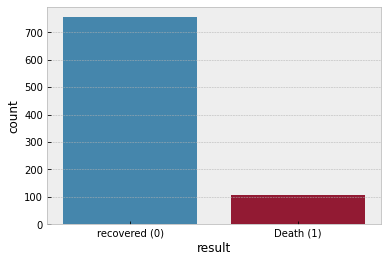

In [ ]:
# plot the no of 1's and 0's
g = sns.countplot(dataset ['result'])
g.set_xticklabels(['recovered (0)', 'Death (1)']) 
plt.show()

# **Correlational Analysis**


In [ ]:
dataset.corr().style.background_gradient(cmap='Oranges')

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
location,1.000000,0.309347,0.030077,-0.027330,0.022821,0.080120,0.033078,0.017961,0.010472,-0.026823,0.033692,0.015341,-0.119397,0.046240
country,0.309347,1.000000,0.193208,0.072339,-0.149798,-0.194170,-0.078971,-0.085210,-0.042933,-0.018526,-0.009371,-0.004384,-0.146037,-0.094443
gender,0.030077,0.193208,1.000000,-0.020662,-0.005588,-0.138997,0.146706,0.116159,0.090858,0.021882,0.026320,0.039867,-0.176528,-0.061441
age,-0.027330,0.072339,-0.020662,1.000000,-0.157173,-0.051229,-0.209028,-0.127251,-0.074863,-0.069396,0.049817,0.055145,0.074573,0.515127
vis_wuhan,0.022821,-0.149798,-0.005588,-0.157173,1.000000,-0.154200,0.087330,0.094360,0.086113,0.063738,0.025780,0.016062,0.065908,-0.151122
from_wuhan,0.080120,-0.194170,-0.138997,-0.051229,-0.154200,1.000000,0.036539,0.046923,0.068144,0.021704,0.018999,0.011837,0.019706,0.128314
symptom1,0.033078,-0.078971,0.146706,-0.209028,0.087330,0.036539,1.000000,0.519404,0.260397,0.095402,-0.002658,0.086430,-0.141160,-0.163039
symptom2,0.017961,-0.085210,0.116159,-0.127251,0.094360,0.046923,0.519404,1.000000,0.530968,0.329583,0.159823,0.072975,-0.119052,-0.103270
symptom3,0.010472,-0.042933,0.090858,-0.074863,0.086113,0.068144,0.260397,0.530968,1.000000,0.429853,0.120301,0.146347,-0.124293,-0.074982
symptom4,-0.026823,-0.018526,0.021882,-0.069396,0.063738,0.021704,0.095402,0.329583,0.429853,1.000000,0.277558,0.110553,-0.089592,-0.108723


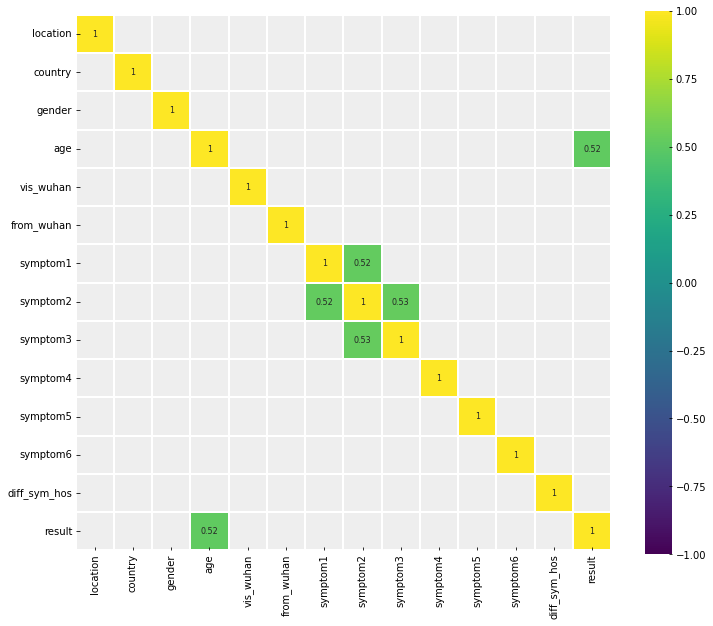

In [ ]:
corr = dataset.corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

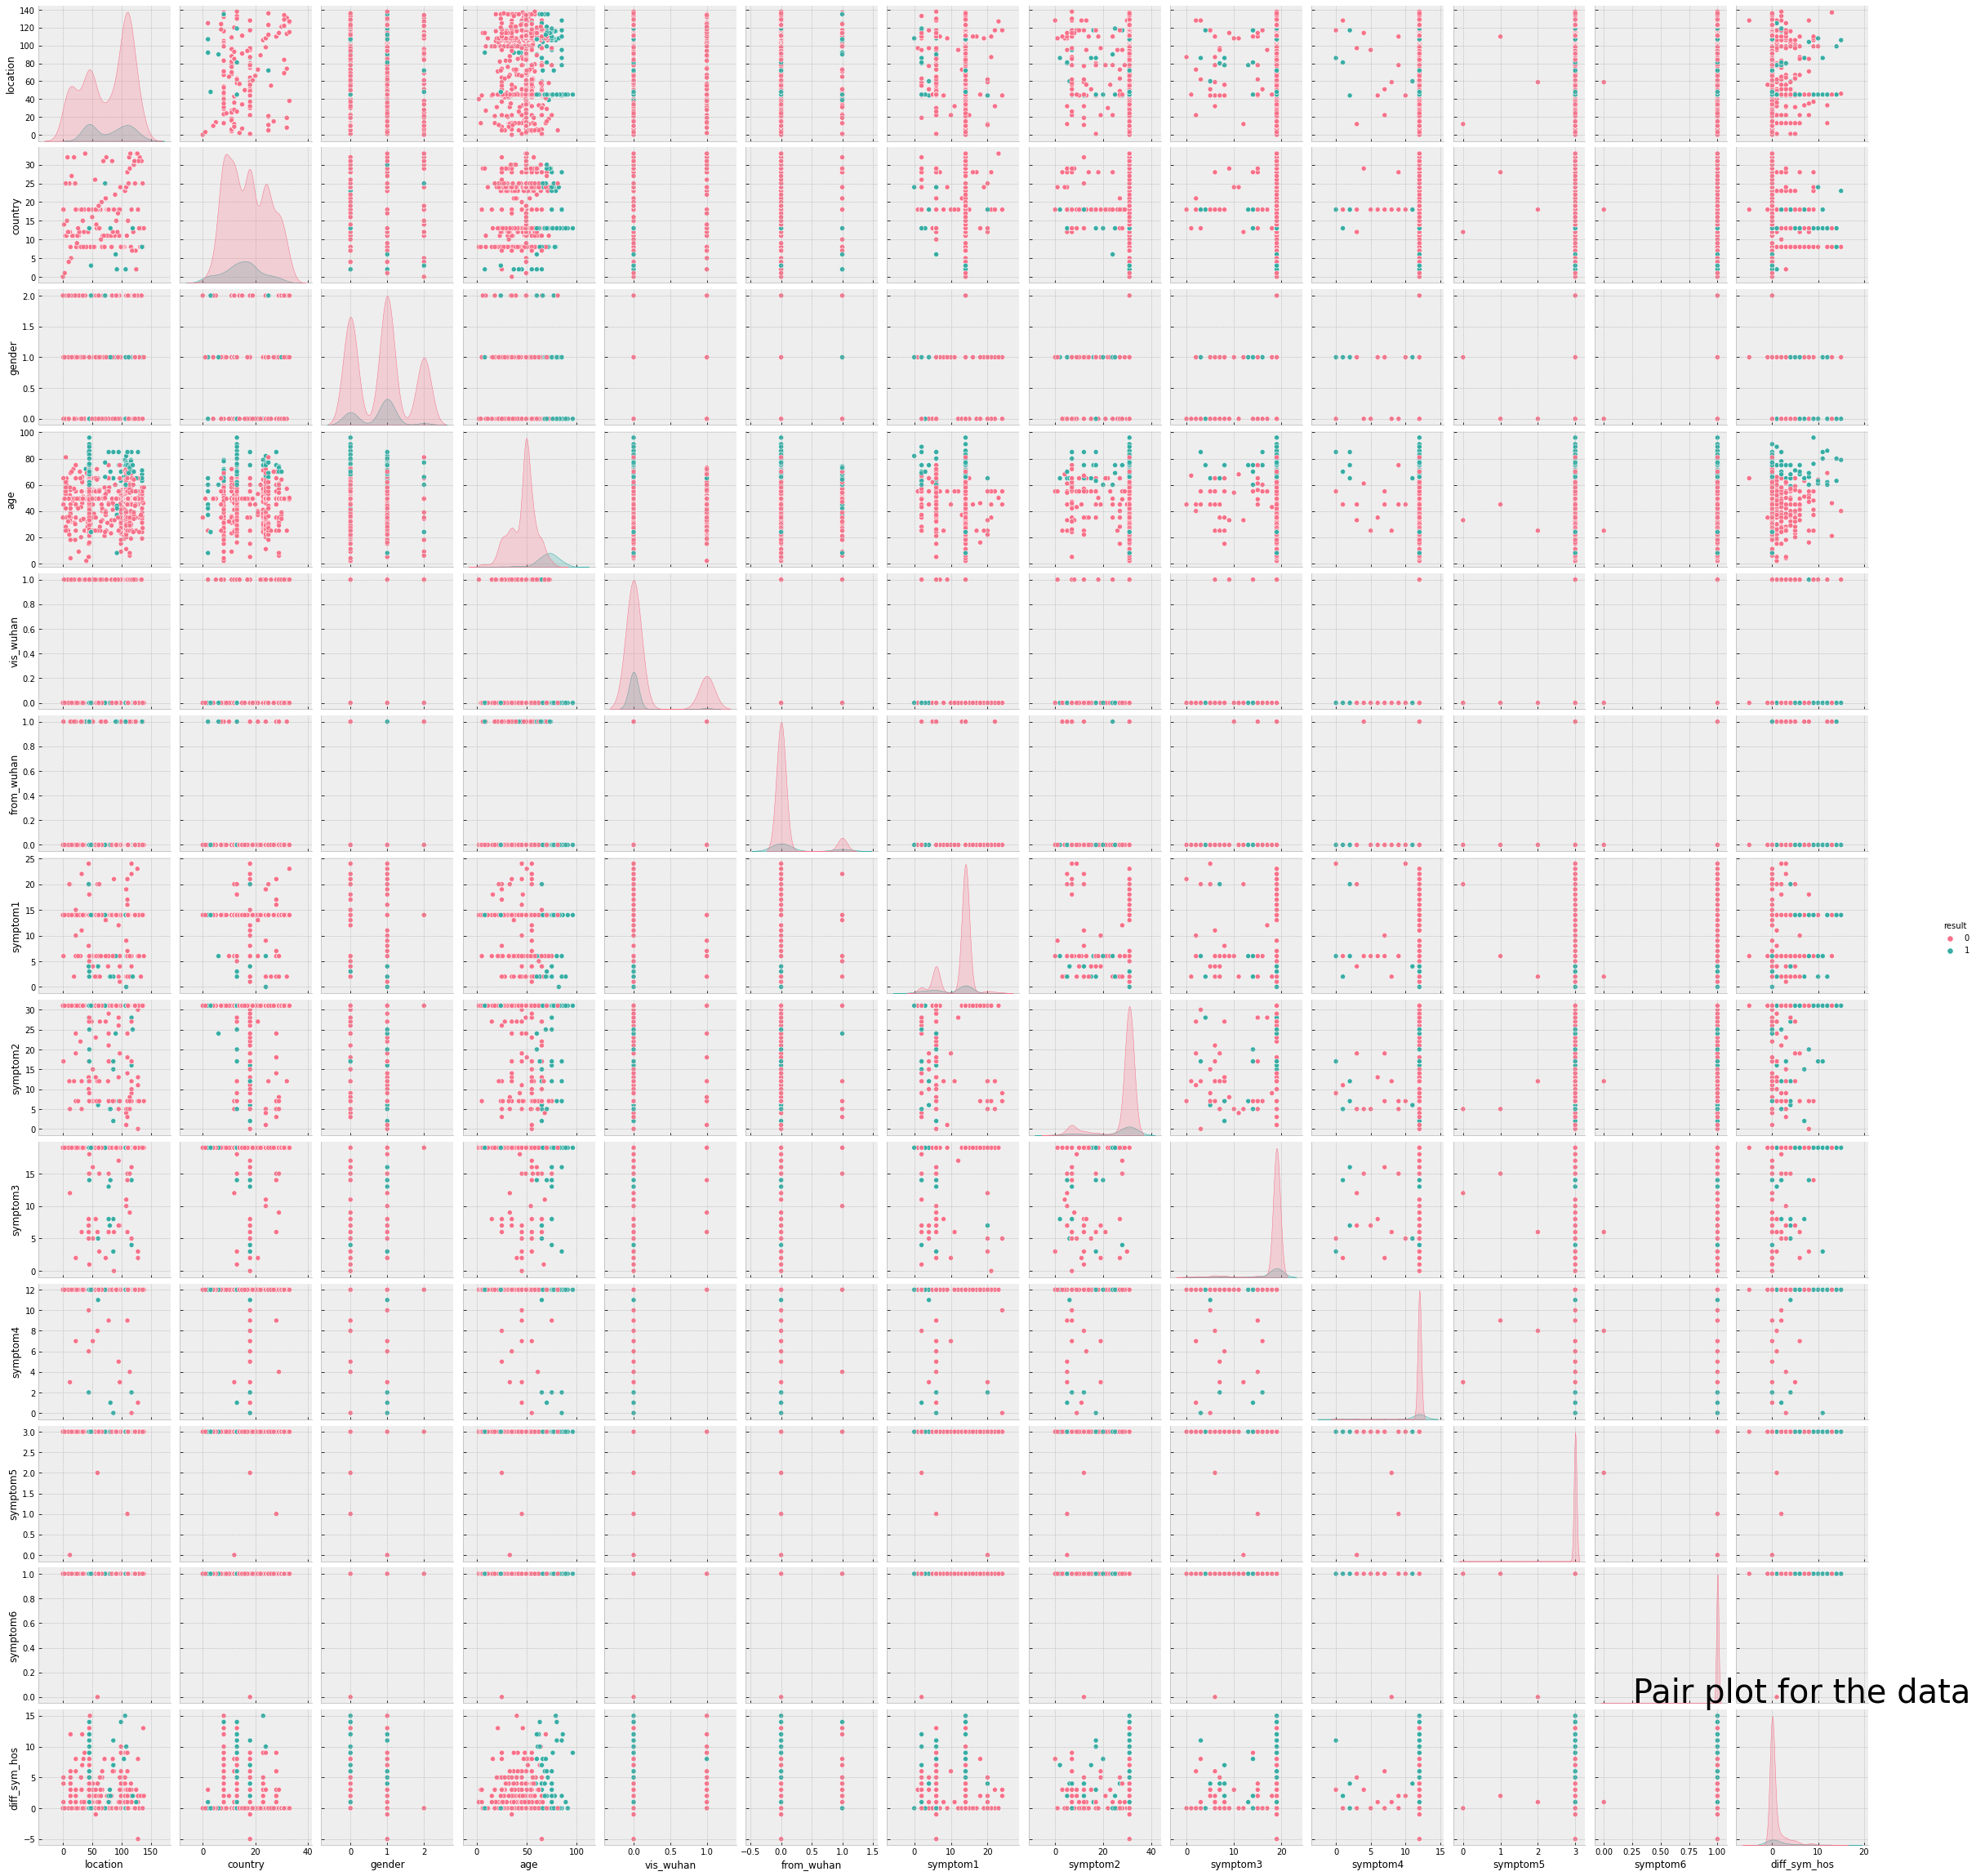

In [ ]:
plt.rcParams['figure.figsize'] = (40, 41)
sns.pairplot(dataset, hue = 'result', palette = 'husl')
plt.title('Pair plot for the data', fontsize = 40)
plt.show()

# **Numerical data distribution**

For this part lets look at the distribution of some of the features by ploting them


count    863.000000
mean      49.400000
std       15.079203
min        2.000000
25%       40.000000
50%       49.400000
75%       57.000000
max       96.000000
Name: age, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


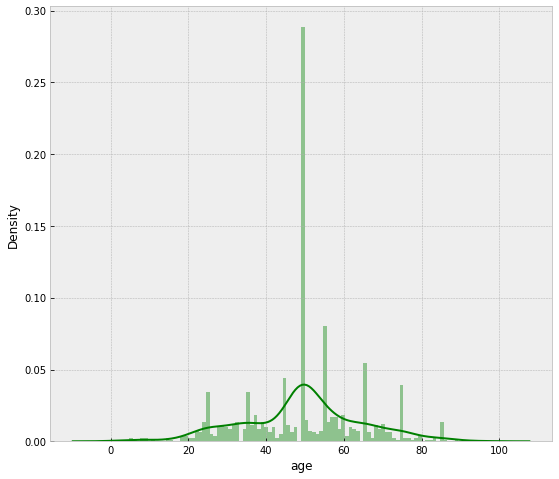

In [ ]:
print(dataset['age'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(dataset['age'], color='g', bins=100, hist_kws={'alpha': 0.4});

count    863.000000
mean      76.645423
std       39.200264
min        0.000000
25%       45.000000
50%       87.000000
75%      110.000000
max      138.000000
Name: location, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


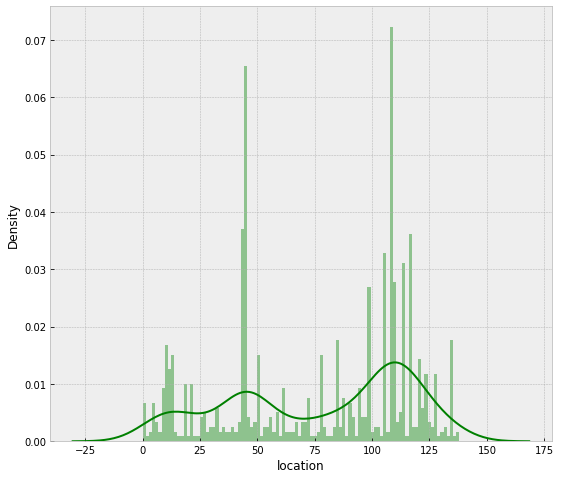

In [ ]:
print(dataset['location'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(dataset['location'], color='g', bins=100, hist_kws={'alpha': 0.4});

count    863.000000
mean      16.995365
std        7.809951
min        0.000000
25%       11.000000
50%       18.000000
75%       24.000000
max       33.000000
Name: country, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


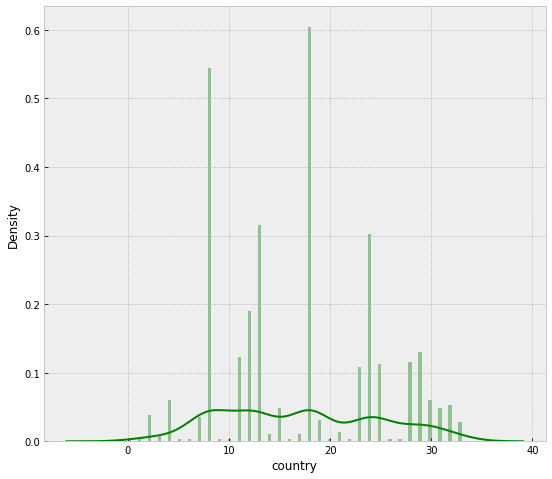

In [ ]:
print(dataset['country'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(dataset['country'], color='g', bins=100, hist_kws={'alpha': 0.4});

count    863.000000
mean       0.995365
std        2.358767
min       -5.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       15.000000
Name: diff_sym_hos, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


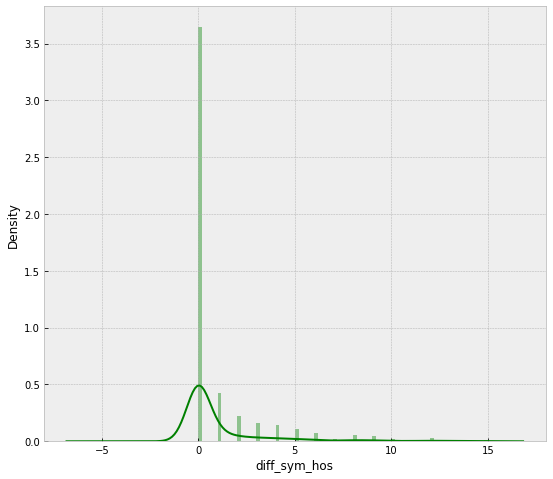

In [ ]:
print(dataset['diff_sym_hos'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(dataset['diff_sym_hos'], color='g', bins=100, hist_kws={'alpha': 0.4});

# **Explore and Handling outliers**

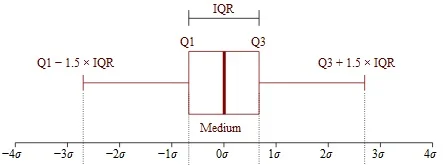

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 28.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


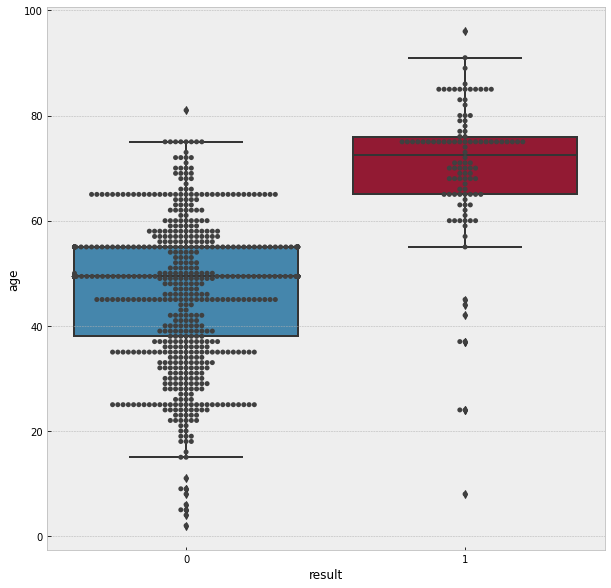

In [ ]:
#boxplot
plt.rcParams['figure.figsize'] = (10, 10)
ax = sns.boxplot(x="result", y="age", data=dataset)
ax = sns.swarmplot(x="result", y="age", data=dataset, color=".25")

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 72.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 21.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


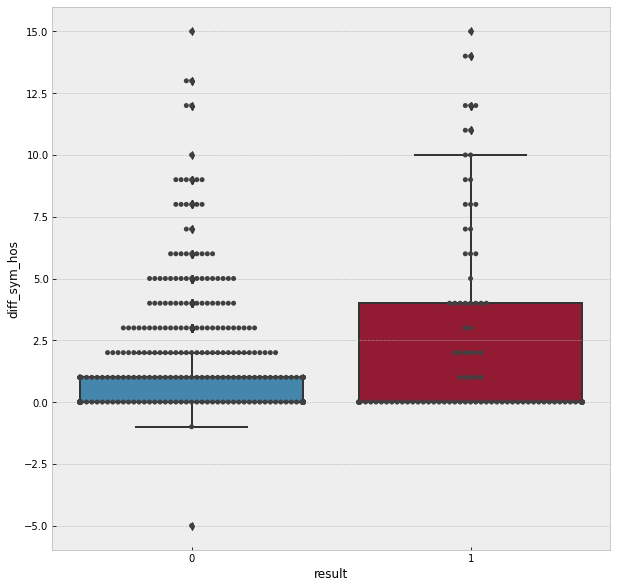

In [ ]:
#boxplot
plt.rcParams['figure.figsize'] = (10, 10)
ax = sns.boxplot(x="result", y="diff_sym_hos", data=dataset)
ax = sns.swarmplot(x="result", y="diff_sym_hos", data=dataset, color=".25")

# **Feature Scaling**

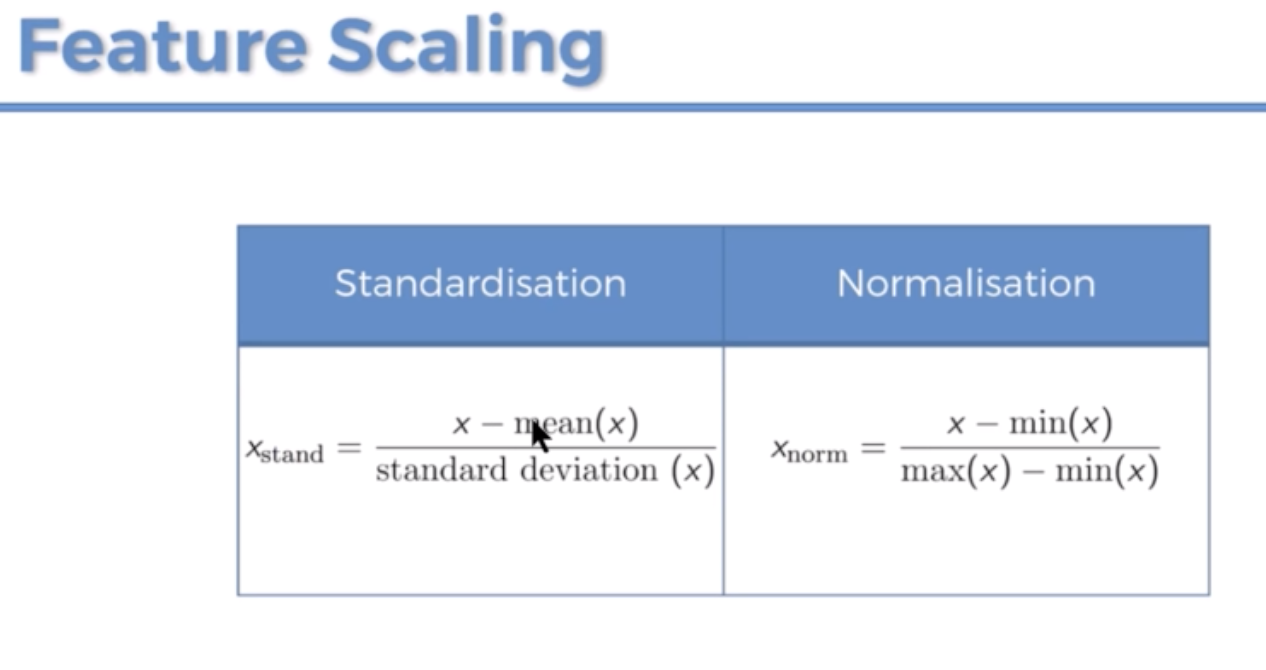

In [ ]:
X=dataset.iloc[:,2:]
Y=dataset.iloc[:,-1]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X=sc.fit_transform(X)

# **Splitting the dataset into the Training set and Test set**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size =0.2,stratify=Y,  random_state = 42)

# **Fitting classifier to the Training set**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc,classification_report

# **Evaluating a classification model**

There are multiple ways to evaluate a classification model.

- Confusion Matrix.
- ROC Curve
- AUC Curve.

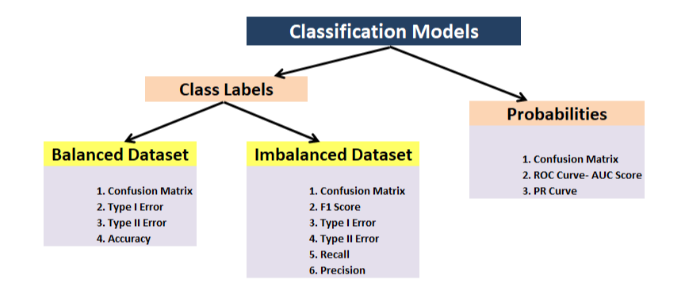

# **Confusion Matrix**
Confusion matrix, a table that describes the performance of a classification model. Confusion Matrix tells us how many our model predicted correctly and incorrectly in terms of binary/multiple outcome classes by comparing actual and predicted cases. For example, in terms of this dataset, our model is a binary one and we are trying to classify whether the passenger survived or not survived. we have fit the model using X_train and y_train and predicted the outcome of X_test in the variable y_pred. So, now we will use a confusion matrix to compare between y_test and y_pred. Let's do the confusion matrix.

In [ ]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[151   0]
 [  0  22]]


Accuracy of Logistic Regression: 100.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00        22

    accuracy                           1.00       173
   macro avg       1.00      1.00      1.00       173
weighted avg       1.00      1.00      1.00       173



In [ ]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(x_train,y_train)
nbpred = nb.predict(x_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[151   0]
 [  0  22]]


Accuracy of Naive Bayes model: 100.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00        22

    accuracy                           1.00       173
   macro avg       1.00      1.00      1.00       173
weighted avg       1.00      1.00      1.00       173



In [ ]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=3,algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, p=2,
                     weights="distance")
knn.fit(x_train, y_train)
knn_predicted = knn.predict(x_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[151   0]
 [  0  22]]


Accuracy of K-NeighborsClassifier: 100.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00        22

    accuracy                           1.00       173
   macro avg       1.00      1.00      1.00       173
weighted avg       1.00      1.00      1.00       173



In [ ]:
from sklearn.tree import DecisionTreeClassifier
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(x_train, y_train)
dt_predicted = dt.predict(x_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[151   0]
 [  0  22]]


Accuracy of DecisionTreeClassifier: 100.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00        22

    accuracy                           1.00       173
   macro avg       1.00      1.00      1.00       173
weighted avg       1.00      1.00      1.00       173



In [ ]:
from sklearn.svm import SVC
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=11)
svc.fit(x_train, y_train)
svc_predicted = svc.predict(x_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[151   0]
 [  0  22]]


Accuracy of Support Vector Classifier: 100.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00        22

    accuracy                           1.00       173
   macro avg       1.00      1.00      1.00       173
weighted avg       1.00      1.00      1.00       173



In [ ]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,100.0
1,Naive Bayes,100.0
2,K-Nearest Neighbour,100.0
3,Decision Tree,100.0
4,Support Vector Machine,100.0


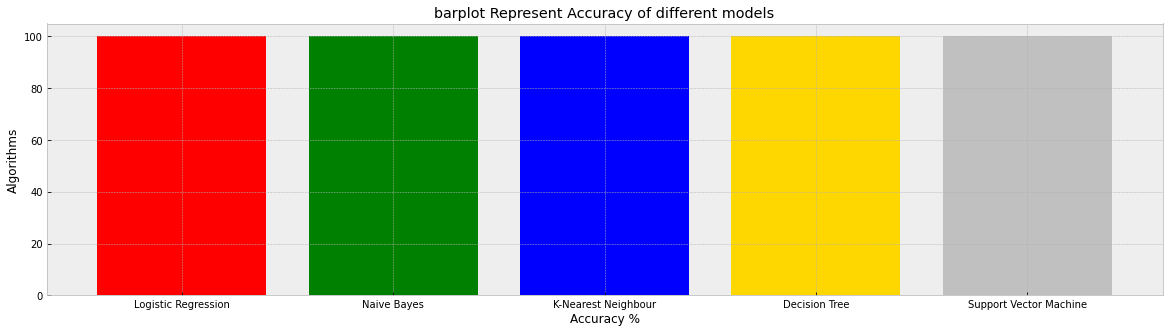

In [ ]:
colors = ['red','green','blue','gold','silver']
plt.figure(figsize=(20,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

# **AUC & ROC Curve**

Confusion Matrix ### Under-fitting & Over-fitting: So, we have our first model and its score. But, how do we make sure that our model is performing well. Our model may be overfitting or underfitting. In fact, for those of you don't know what overfitting and underfitting is, Let's find out.

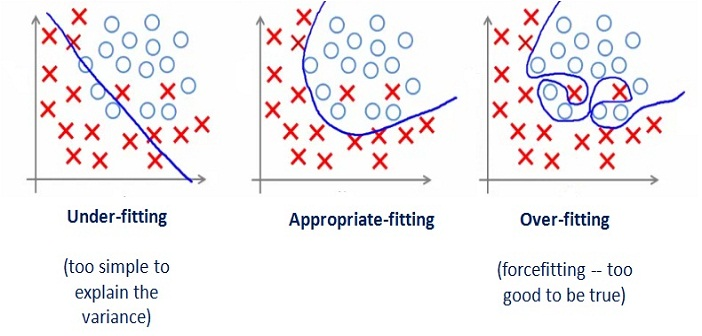

As you see in the chart above. Underfitting is when the model fails to capture important aspects of the data and therefore introduces more bias and performs poorly. On the other hand, Overfitting is when the model performs too well on the training data but does poorly in the validation set or test sets. This situation is also known as having less bias but more variation and perform poorly as well. Ideally, we want to configure a model that performs well not only in the training data but also in the test data. This is where bias-variance tradeoff comes in. When we have a model that overfits, meaning less biased and more of variance, we introduce some bias in exchange of having much less variance. One particular tactic for this task is regularization models (Ridge, Lasso, Elastic Net). These models are built to deal with the bias-variance tradeoff. 

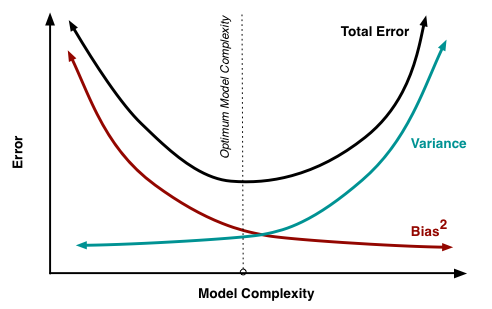

deally, we want to pick a sweet spot where the model performs well in training set, validation set, and test set. As the model gets complex, bias decreases, variance increases. However, the most critical part is the error rates. We want our models to be at the bottom of that U shape where the error rate is the least. That sweet spot is also known as Optimum Model Complexity(OMC).

Now that we know what we want in terms of under-fitting and over-fitting, let's talk about how to combat them.

How to combat over-fitting?

- Simplify the model by using less parameters.
- Simplify the model by changing the hyperparameters.
- Introducing regularization models.
- Use more training data.
- Gatter more data ( and gather better quality data).

**Using Cross-validation:**

Pros:

- Helps reduce variance.
- Expends models predictability.

# **Grid Search on KNN**

- What is grid search?
- What are the pros and cons?

Gridsearch is a simple concept but effective technique in Machine Learning. The word GridSearch stands for the fact that we are searching for optimal parameter/parameters over a "grid." These optimal parameters are also known as Hyperparameters. The Hyperparameters are model parameters that are set before fitting the model and determine the behavior of the model.. For example, when we choose to use linear regression, we may decide to add a penalty to the loss function such as Ridge or Lasso. These penalties require specific alpha (the strength of the regularization technique) to set beforehand. The higher the value of alpha, the more penalty is being added. GridSearch finds the optimal value of alpha among a range of values provided by us, and then we go on and use that optimal value to fit the model and get sweet results. It is essential to understand those model parameters are different from models outcomes, for example, coefficients or model evaluation metrics such as accuracy score or mean squared error are model outcomes and different than hyperparameters.

# **K-Nearest Neighbor classifier(KNN)**

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold,cross_val_score,StratifiedShuffleSplit
## calling on the model oject. 
knn = KNeighborsClassifier(metric='minkowski', p=2)
## knn classifier works by doing euclidian distance 


## doing 10 fold staratified-shuffle-split cross validation 
cv = StratifiedShuffleSplit(n_splits=10, test_size=.25, random_state=2)

accuracies = cross_val_score(knn, x_train,y_train, cv = cv, scoring='accuracy')
print ("Cross-Validation accuracy scores:{}".format(accuracies))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),3)))

Cross-Validation accuracy scores:[1.         0.99421965 1.         1.         1.         1.
 1.         1.         1.         1.        ]
Mean Cross-Validation accuracy score: 0.999


**Manually find the best possible k value for KNN**

In [ ]:
## Search for an optimal value of k for KNN.
k_range = range(1,11)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,  x_train,y_train, cv = cv, scoring = 'accuracy')
    k_scores.append(scores.mean())
print("Accuracy scores are: {}\n".format(k_scores))
print ("Mean accuracy score: {}".format(np.mean(k_scores)))

Accuracy scores are: [1.0, 1.0, 1.0, 0.999421965317919, 0.999421965317919, 0.999421965317919, 0.999421965317919, 0.9976878612716764, 0.9982658959537571, 0.9976878612716764]

Mean accuracy score: 0.9991329479768787


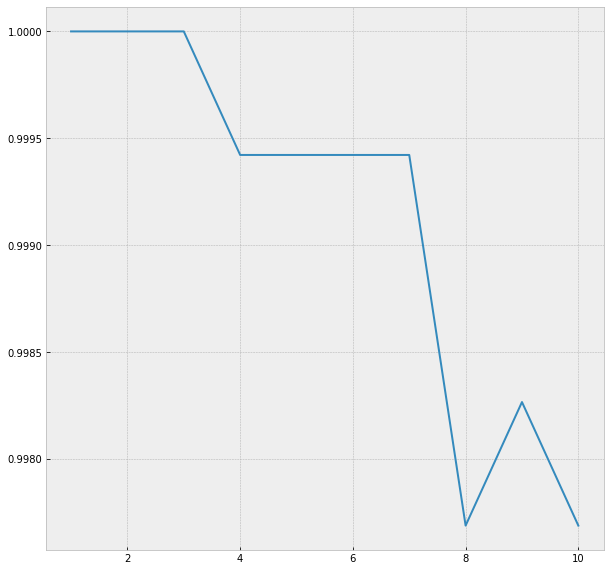

In [ ]:
plt.plot(k_range, k_scores)

 **Grid search on KNN classifier**

In [ ]:
from sklearn.model_selection import GridSearchCV
## trying out multiple values for k
k_range = range(1,5)
## 
weights_options=['uniform','distance']
# 
param = {'n_neighbors':k_range, 'weights':weights_options}
## Using startifiedShufflesplit. 
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
# estimator = knn, param_grid = param, n_jobs = -1 to instruct scikit learn to use all available processors. 
grid = GridSearchCV(KNeighborsClassifier(), param,cv=cv,verbose = False, n_jobs=-1)
## Fitting the model. 
grid.fit( x_train,y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 5),
                         'weights': ['uniform', 'distance']},
             verbose=False)

In [ ]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9995169082125603
{'n_neighbors': 1, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=1)


**Using best estimator from grid search using KNN.**

In [ ]:
### Using the best parameters from the grid-search.
knn_grid= grid.best_estimator_
knn_grid.score( x_train,y_train)

1.0

**Using RandomizedSearchCV**

Randomized search is a close cousin of grid search. It doesn't always provide the best result but its fast.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
## trying out multiple values for k
k_range = range(1,5)
## 
weights_options=['uniform','distance']
# 
param = {'n_neighbors':k_range, 'weights':weights_options}
## Using startifiedShufflesplit. 
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30)
# estimator = knn, param_grid = param, n_jobs = -1 to instruct scikit learn to use all available processors. 
## for RandomizedSearchCV, 
grid = RandomizedSearchCV(KNeighborsClassifier(), param,cv=cv,verbose = False, n_jobs=-1, n_iter=40)
## Fitting the model. 
grid.fit( x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 8 is smaller than n_iter=40. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.3,
            train_size=None),
                   estimator=KNeighborsClassifier(), n_iter=40, n_jobs=-1,
                   param_distributions={'n_neighbors': range(1, 5),
                                        'weights': ['uniform', 'distance']},
                   verbose=False)

In [ ]:
print (grid.best_score_)
print (grid.best_params_)
print(grid.best_estimator_)

0.9995169082125603
{'weights': 'uniform', 'n_neighbors': 1}
KNeighborsClassifier(n_neighbors=1)


In [ ]:
### Using the best parameters from the grid-search.
knn_ran_grid = grid.best_estimator_
knn_ran_grid.score(x_train,y_train)

1.0

In [ ]:
knn_predicted = knn_ran_grid.predict(x_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[151   0]
 [  0  22]]


Accuracy of K-NeighborsClassifier: 100.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00        22

    accuracy                           1.00       173
   macro avg       1.00      1.00      1.00       173
weighted avg       1.00      1.00      1.00       173



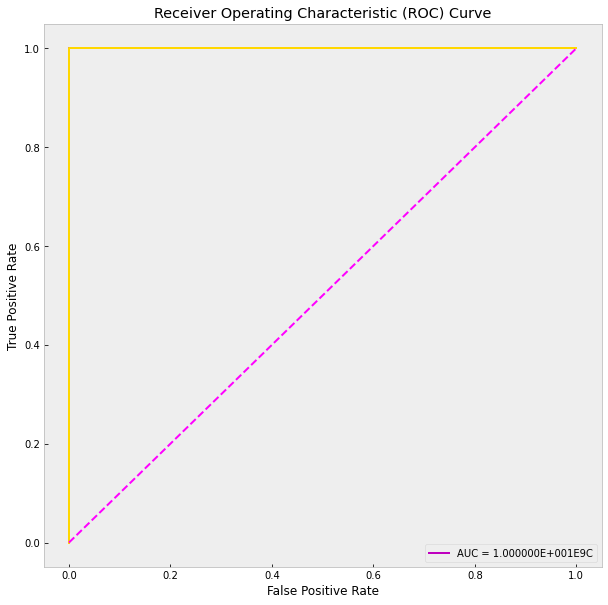

In [ ]:
#Calculating Area Under the Curve with predict probapility
fpr, tpr, thresholds = roc_curve(y_test, knn_ran_grid.predict_proba(x_test)[:,1])
roc_auc = roc_auc_score(y_test, knn_ran_grid.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, 'm', label = 'AUC = %7E1E9C' % roc_auc)
plt.plot(fpr, tpr, color='gold', label='')
plt.plot([0, 1], [0, 1], color='magenta', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')
plt.grid()
plt.show()

# **LogisticRegression**

In [ ]:
grid_values = {'C':[0.001,.005,0.08,0.1,0.5,0.8,1.2,1,5,10,25, 1e5], 'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
grid_lr_acc = GridSearchCV(lr, param_grid = grid_values,  cv= 10 , n_jobs= -1,scoring = 'accuracy')
grid_lr_acc.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.005, 0.08, 0.1, 0.5, 0.8, 1.2, 1, 5, 10,
                               25, 100000.0],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [ ]:
print(grid_lr_acc.best_score_)
print(grid_lr_acc.best_params_)
print(grid_lr_acc.best_estimator_)

1.0
{'C': 0.5, 'solver': 'newton-cg'}
LogisticRegression(C=0.5, solver='newton-cg')


In [ ]:
LogisticRegressionModel = LogisticRegression(solver = 'liblinear', C = 5, random_state=1, max_iter = 1000)
LogisticRegressionModel.fit(x_train, y_train)

LogisticRegression(C=5, max_iter=1000, random_state=1, solver='liblinear')

In [ ]:
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(x_train, y_train))

LogisticRegressionModel Train Score is :  1.0


In [ ]:

lr_predicted = LogisticRegressionModel.predict(x_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[151   0]
 [  0  22]]


Accuracy of Logistic Regression: 100.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00        22

    accuracy                           1.00       173
   macro avg       1.00      1.00      1.00       173
weighted avg       1.00      1.00      1.00       173



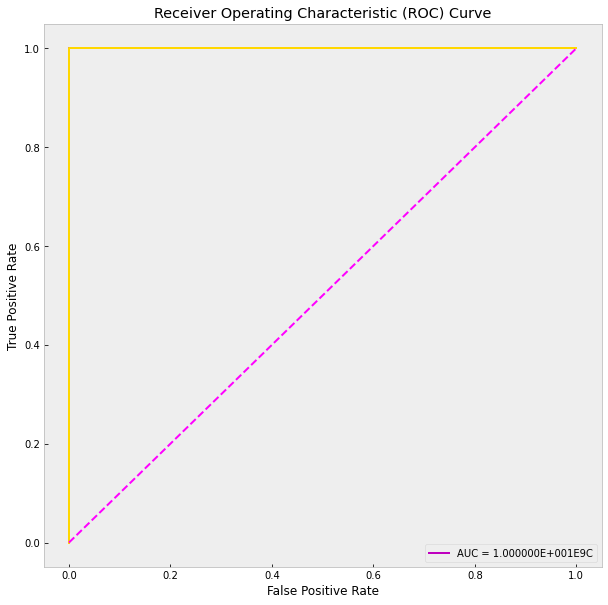

In [ ]:
#Calculating Area Under the Curve with predict probapility
fpr, tpr, thresholds = roc_curve(y_test, LogisticRegressionModel.predict_proba(x_test)[:,1])
roc_auc = roc_auc_score(y_test, LogisticRegressionModel.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, 'm', label = 'AUC = %7E1E9C' % roc_auc)
plt.plot(fpr, tpr, color='gold', label='')
plt.plot([0, 1], [0, 1], color='magenta', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')
plt.grid()
plt.show()

# **Gaussian Naive Bayes**

In [ ]:
gnb_clf = GaussianNB()
parameters = {
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
}
clf = GridSearchCV(gnb_clf, parameters, cv=5)
clf.fit(x_train, y_train)
print(clf.best_score_)
print(clf.best_params_)
print(clf.best_estimator_)

1.0
{'var_smoothing': 0.01}
GaussianNB(var_smoothing=0.01)


In [ ]:
nbpred = clf.predict(x_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[151   0]
 [  0  22]]


Accuracy of Naive Bayes model: 100.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00        22

    accuracy                           1.00       173
   macro avg       1.00      1.00      1.00       173
weighted avg       1.00      1.00      1.00       173



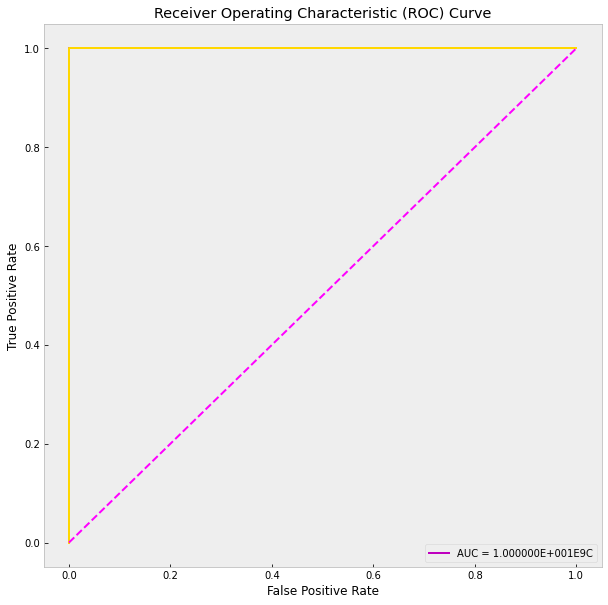

In [ ]:
#Calculating Area Under the Curve with predict probapility
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])
roc_auc = roc_auc_score(y_test, clf.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, 'm', label = 'AUC = %7E1E9C' % roc_auc)
plt.plot(fpr, tpr, color='gold', label='')
plt.plot([0, 1], [0, 1], color='magenta', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')
plt.grid()
plt.show()

# **Support Vector Machines(SVM)**

In [ ]:
Cs = [0.001, 0.01, 0.1, 1,1.5,2,2.5,3,4,5, 10] ## penalty parameter C for the error term. 
gammas = [0.0001,0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
grid_search = GridSearchCV(SVC(kernel = 'rbf', probability=True), param_grid, cv=cv) ## 'rbf' stands for gaussian kernel
grid_search.fit( x_train,y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=SVC(probability=True),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 1.5, 2, 2.5, 3, 4, 5, 10],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1]})

In [ ]:
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

1.0
{'C': 1, 'gamma': 0.01}
SVC(C=1, gamma=0.01, probability=True)


In [ ]:
# using the best found hyper paremeters to get the score. 
svm_grid = grid_search.best_estimator_
svm_grid.score( x_train,y_train)

1.0

In [ ]:
svc_predicted = svm_grid.predict(x_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[151   0]
 [  0  22]]


Accuracy of Support Vector Classifier: 100.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00        22

    accuracy                           1.00       173
   macro avg       1.00      1.00      1.00       173
weighted avg       1.00      1.00      1.00       173



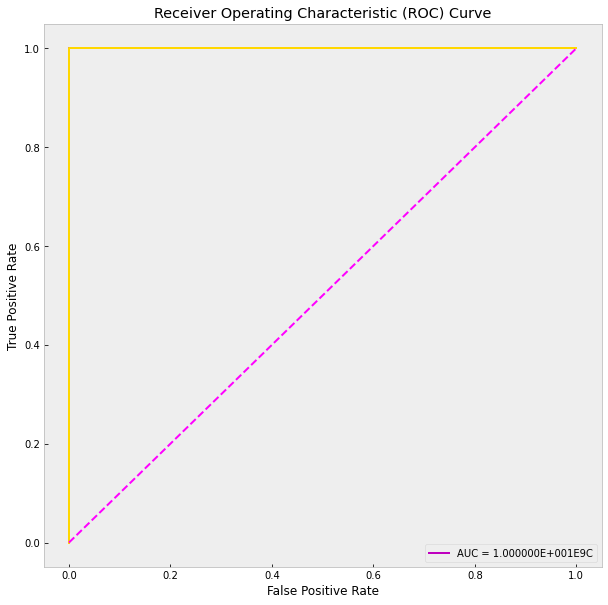

In [ ]:
#Calculating Area Under the Curve with predict probapility
fpr, tpr, thresholds = roc_curve(y_test, svm_grid.predict_proba(x_test)[:,1])
roc_auc = roc_auc_score(y_test, svm_grid.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, 'm', label = 'AUC = %7E1E9C' % roc_auc)
plt.plot(fpr, tpr, color='gold', label='')
plt.plot([0, 1], [0, 1], color='magenta', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')
plt.grid()
plt.show()

# **Decision Tree Classifier**

Decision tree works by breaking down the dataset into small subsets. This breaking down process is done by asking questions about the features of the datasets. The idea is to unmix the labels by asking fewer questions necessary. As we ask questions, we are breaking down the dataset into more subsets. Once we have a subgroup with only the unique type of labels, we end the tree in that node.

In [ ]:
max_depth = range(1,10)
max_feature = [21,22,23,24,25,26,28,29,30,'auto']
criterion=["entropy", "gini"]

param = {'max_depth':max_depth, 
         'max_features':max_feature, 
         'criterion': criterion}
grid = GridSearchCV(DecisionTreeClassifier(), 
                                param_grid = param, 
                                 verbose=False, 
                                 cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
                                n_jobs = -1)
grid.fit(X, Y) 

In [ ]:
print( grid.best_params_)
print (grid.best_score_)
print (grid.best_estimator_)

{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto'}
0.9953488372093023
DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='auto')


In [ ]:
dectree_grid = grid.best_estimator_
## using the best found hyper paremeters to get the score. 
dectree_grid.score( x_train,y_train)

1.0

In [ ]:
dt_predicted = dectree_grid.predict(x_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[151   0]
 [  0  22]]


Accuracy of DecisionTreeClassifier: 100.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00        22

    accuracy                           1.00       173
   macro avg       1.00      1.00      1.00       173
weighted avg       1.00      1.00      1.00       173



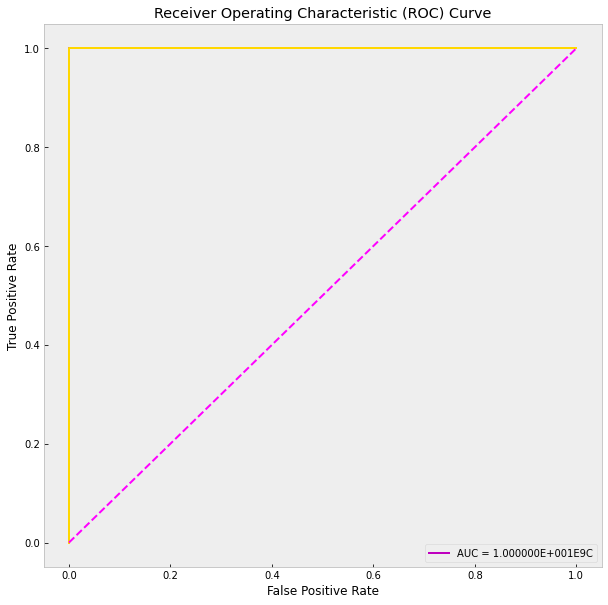

In [ ]:
#Calculating Area Under the Curve with predict probapility
fpr, tpr, thresholds = roc_curve(y_test, dectree_grid.predict_proba(x_test)[:,1])
roc_auc = roc_auc_score(y_test, dectree_grid.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, 'm', label = 'AUC = %7E1E9C' % roc_auc)
plt.plot(fpr, tpr, color='gold', label='')
plt.plot([0, 1], [0, 1], color='magenta', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')
plt.grid()
plt.show()